Реализуем алгоритм kNN с помощью Python.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

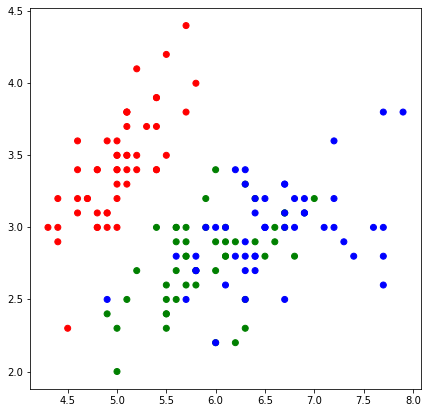

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

### 1.
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.
### 2.
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [6]:
def knn(x_train, y_train, x_test, k, weight=None, q=0.1):

    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}

        # 1. 2. Сортируем список и среди первых k элементов подсчитаем ВЗВЕШЕННУЮ частоту появления разных классов
        sorted_distances = sorted(test_distances)
        for j in range(k):
            d = sorted_distances[j]
            classes[d[1]] += 1
            if weight == 'rank':  # ..от номера соседа
                classes[d[1]] *= q ** j
            elif weight == 'distance':  # ..от расстояния до соседа
                classes[d[1]] *= q ** sorted_distances[j][0]

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        # for d in sorted(test_distances)[0:k]:
        #     classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [8]:
k = 7

y_pred = knn(X_train, y_train, X_test, k)
y_pred_rank = knn(X_train, y_train, X_test, k, weight='rank')
y_pred_distance = knn(X_train, y_train, X_test, k, weight='distance')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность взвешенного алгоритма (на основании номера соседа) при k = {k}: {accuracy(y_pred_rank, y_test):.3f}')
print(f'Точность взвешенного алгоритма (на основании дистанции до соседа) при k = {k}: {accuracy(y_pred_distance, y_test):.3f}')

Точность алгоритма при k = 7: 0.800
Точность взвешенного алгоритма (на основании номера соседа) при k = 7: 0.733
Точность взвешенного алгоритма (на основании дистанции до соседа) при k = 7: 0.833


при k=7 и q=0.1 точность взвешенного алгоритма на основании дистанции до соседа показывает лучший результат

Построим график распределения классов.

In [9]:
def get_graph(X_train, y_train, k, weight=None, q=0.1):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .05

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weight=weight, q=q)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}, взвешивание {weight}")
    plt.show()

<ipython-input-9-1134ef1617e3>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


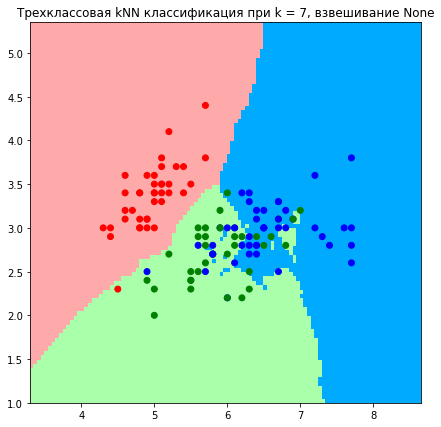

In [10]:
get_graph(X_train, y_train, k)

<ipython-input-9-1134ef1617e3>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


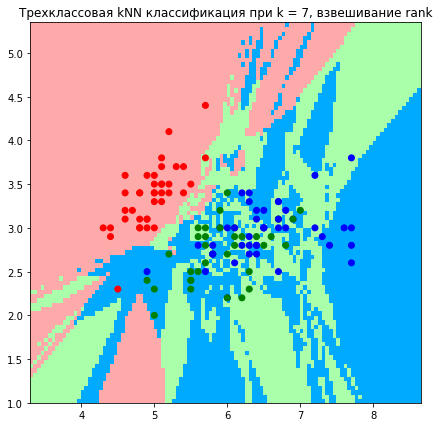

In [11]:
get_graph(X_train, y_train, k, weight='rank')

<ipython-input-9-1134ef1617e3>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


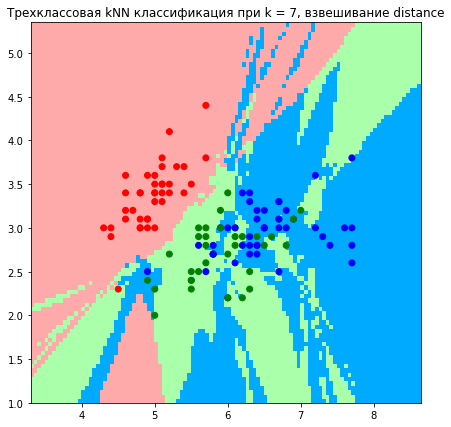

In [12]:
get_graph(X_train, y_train, k, weight='distance')

На графике же видно, что обе взвешенные модели сильно переобучены при данных параметрах

### 3.
Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [13]:
k_neighbors = [i for i in range(1, 20, 2)]
q_parameters = [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

In [14]:
def find_best_model(k_neighbors, q_parameters=None, weight=None):
    best_accuracy = [0, None, None]
    if q_parameters is None:
        for k in k_neighbors:
            y_pred = knn(X_train, y_train, X_test, k, weight=weight)
            current_accuracy = accuracy(y_pred, y_test)
            if current_accuracy > best_accuracy[0]:
                best_accuracy = [current_accuracy, k, None]
        return best_accuracy

    for k in k_neighbors:
        for q in q_parameters:
            y_pred = knn(X_train, y_train, X_test, k, weight=weight, q=q)
            current_accuracy = accuracy(y_pred, y_test)
            if current_accuracy > best_accuracy[0]:
                best_accuracy = [current_accuracy, k, q]
    return best_accuracy



In [15]:
simple_knn = find_best_model(k_neighbors)
simple_knn

[0.8666666666666667, 5, None]

In [16]:
rank_knn = find_best_model(k_neighbors, q_parameters, 'rank')
rank_knn

[0.8666666666666667, 5, 0.95]

In [17]:
distance_knn = find_best_model(k_neighbors, q_parameters, 'distance')
distance_knn

[0.8666666666666667, 5, 0.3]

видим, что точность у всех моделей при их лучших параметрах одинакова

<ipython-input-9-1134ef1617e3>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


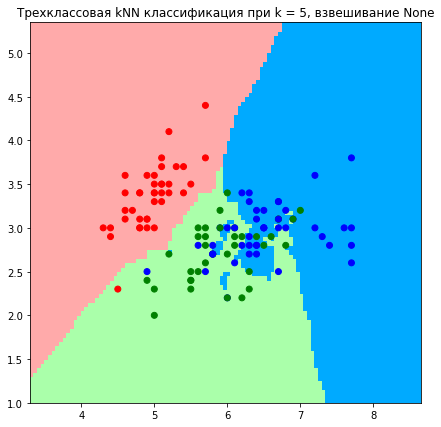

In [18]:
get_graph(X_train, y_train, simple_knn[1])

<ipython-input-9-1134ef1617e3>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


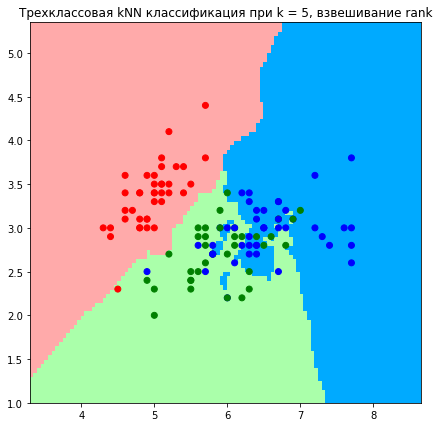

In [19]:
get_graph(X_train, y_train, rank_knn[1], weight='rank', q=rank_knn[2])

<ipython-input-9-1134ef1617e3>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


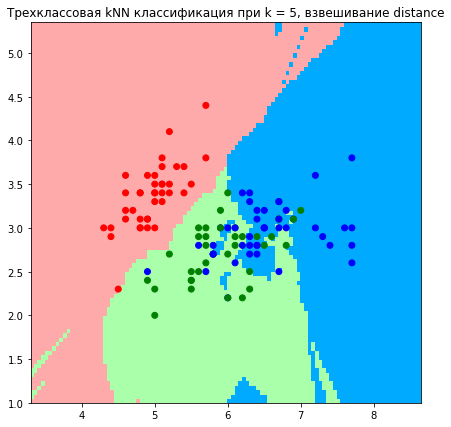

In [20]:
get_graph(X_train, y_train, distance_knn[1], weight='distance', q=distance_knn[2])

разделяющие гиперплоскости выглядят похоже, только последняя модель немного переобучена

### k-means

Сделаем простую реализацию алгоритма K-means своими руками на Python.

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [21]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

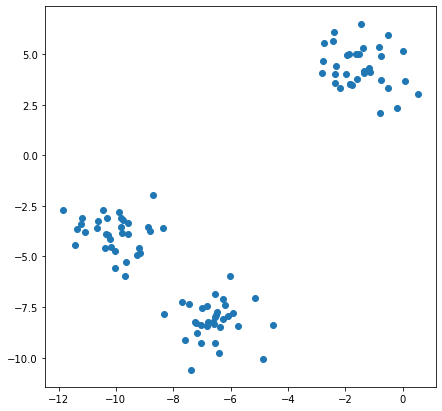

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [23]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}

    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]

    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)

        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()

        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)

        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False

        # если все смещения меньше минимального, останавливаем алгоритм
        if optimal:
            break

    return old_centroids, classes

Напишем функцию для визуализации кластеров

In [24]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']

    plt.figure(figsize=(7,7))

    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')

    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])

    plt.show()

In [25]:
# определим максимальное количество итераций
max_iterations = 7

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k=3

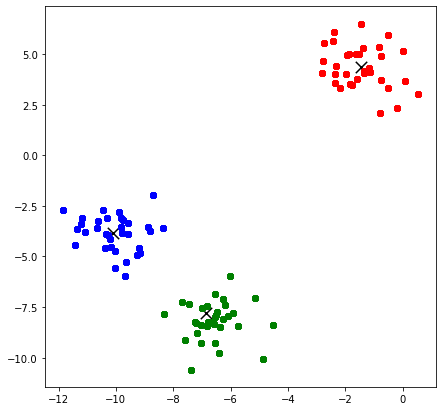

In [26]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

### 4 (опция).
Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [27]:
k_cluster = [i for i in range(1, 11)]

In [28]:
def msd_metrics(centroids, classes:dict):
    result, K = 0, 0
    for key, value in classes.items():
        K = len(value)
        for x in value:
            result += e_metrics(x, centroids[key])**2 / K
    return result

In [29]:
msd_metrics(centroids, clusters)

6.545486499392227

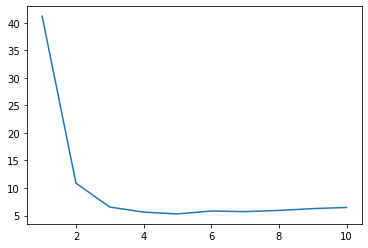

In [30]:
msd = []
for k in k_cluster:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    msd.append(msd_metrics(centroids, clusters))
plt.plot(k_cluster, msd)
plt.show()

Скорее всего здесь работает правило локтя и оптимальными значениями К являются 2 и 3.